In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
column_names = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
data = pd.read_csv("data.csv",sep=",",names=column_names)

In [48]:
# Requirement 1
# Qualitative variable distribution table
gender_quantity = data['Sex'].value_counts().reset_index()
gender_quantity.columns = [' ', 'count']

total_snails = gender_quantity['count'].sum()
gender_quantity['%'] = (gender_quantity['count'] / total_snails) * 100
gender_quantity['%'] = gender_quantity['%'].round(2)
category_counts = gender_quantity.sort_values(by=' ')

gender_quantity[' '] = gender_quantity[' '].replace({'M': 'Male', 'I': 'Infant', 'F': 'Female'})

gender_quantity.set_index(' ', inplace=True)
print(gender_quantity)

        count      %
                    
Male     1528  36.58
Infant   1342  32.13
Female   1307  31.29


In [49]:
# Requirement 2
# Summary statistics for the quantitative variables table
data_rows = []

for variable in column_names[1:]:
    name = variable
    mean = data[variable].mean()
    std = data[variable].std()
    minimum = data[variable].min()
    q1 = data[variable].quantile(0.25)
    median = data[variable].median()
    q3 = data[variable].quantile(0.75)
    maximum = data[variable].max()
    data_rows.append([name, mean, std, minimum, q1, median, q3, maximum])

summary_stats = pd.DataFrame(data_rows, columns=[' ', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

summary_stats.set_index(' ', inplace=True)
print(summary_stats)

                    mean       std     min     25%     50%     75%      max
                                                                           
Length          0.523992  0.120093  0.0750  0.4500  0.5450   0.615   0.8150
Diameter        0.407881  0.099240  0.0550  0.3500  0.4250   0.480   0.6500
Height          0.139516  0.041827  0.0000  0.1150  0.1400   0.165   1.1300
Whole weight    0.828742  0.490389  0.0020  0.4415  0.7995   1.153   2.8255
Shucked weight  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   1.4880
Viscera weight  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   0.7600
Shell weight    0.238831  0.139203  0.0015  0.1300  0.2340   0.329   1.0050
Rings           9.933684  3.224169  1.0000  8.0000  9.0000  11.000  29.0000


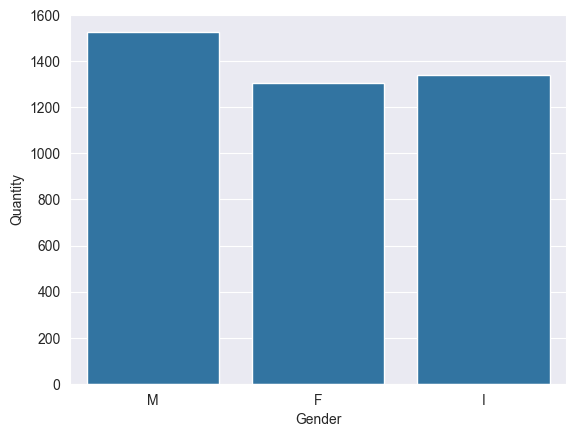

In [6]:
# Requirement 3
# Bar chart of the counts of occurrences of each category for the qualitative variable
sns.countplot(data=data, x='Sex')
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.show()

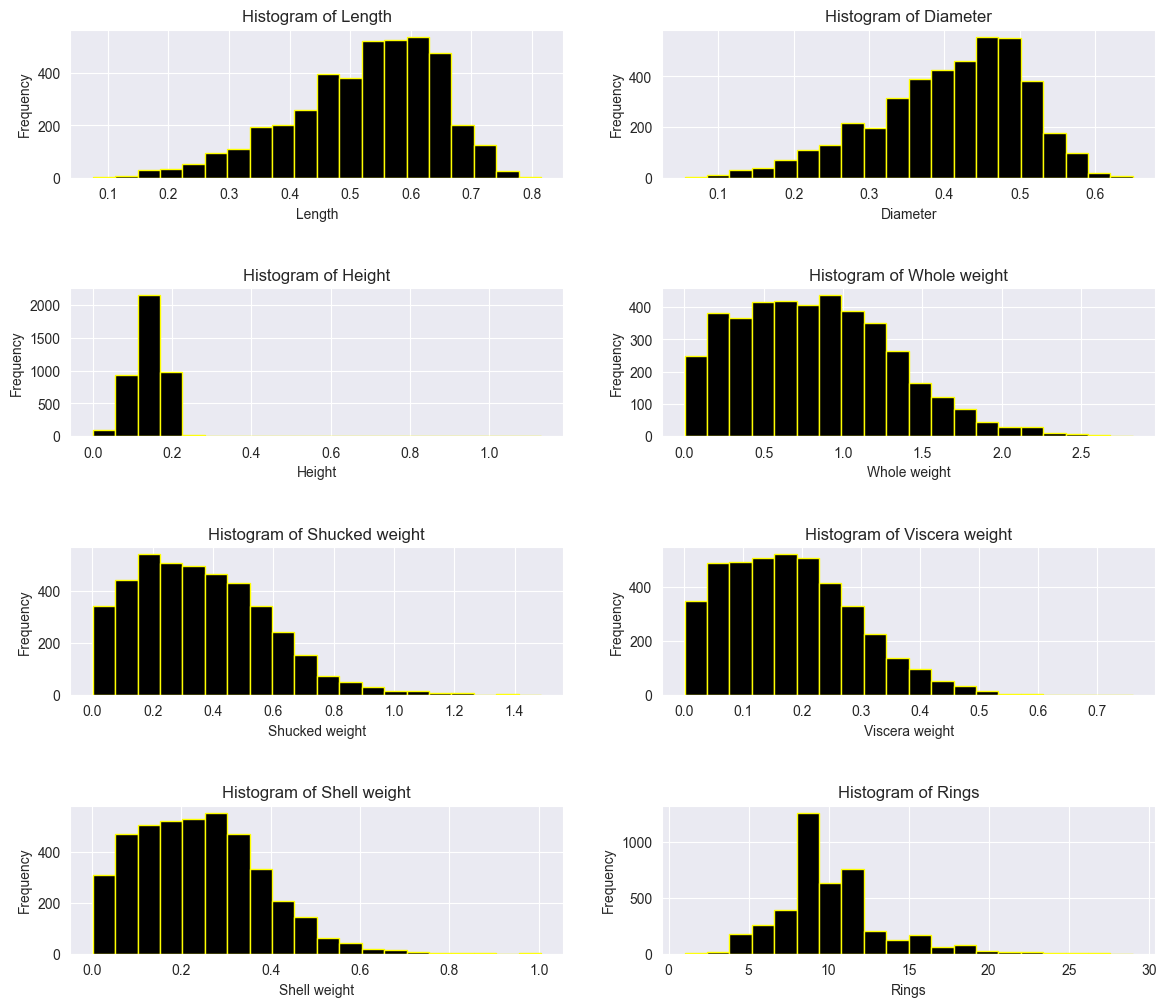

In [7]:
# Requirement 4
# Histogram of each quantitative variable
fig, plots_req4 = plt.subplots(4, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.75)

# A variable to keep track of subplots
i = 0
for variable in column_names[1:]:
    row = i // 2
    col = i % 2
    plots_req4[row, col].hist(data[variable], bins=20, edgecolor='yellow', color='black')
    plots_req4[row, col].set_title(f'Histogram of {variable}')
    plots_req4[row, col].set_xlabel(variable)
    plots_req4[row, col].set_ylabel('Frequency')
    i += 1
plt.show()

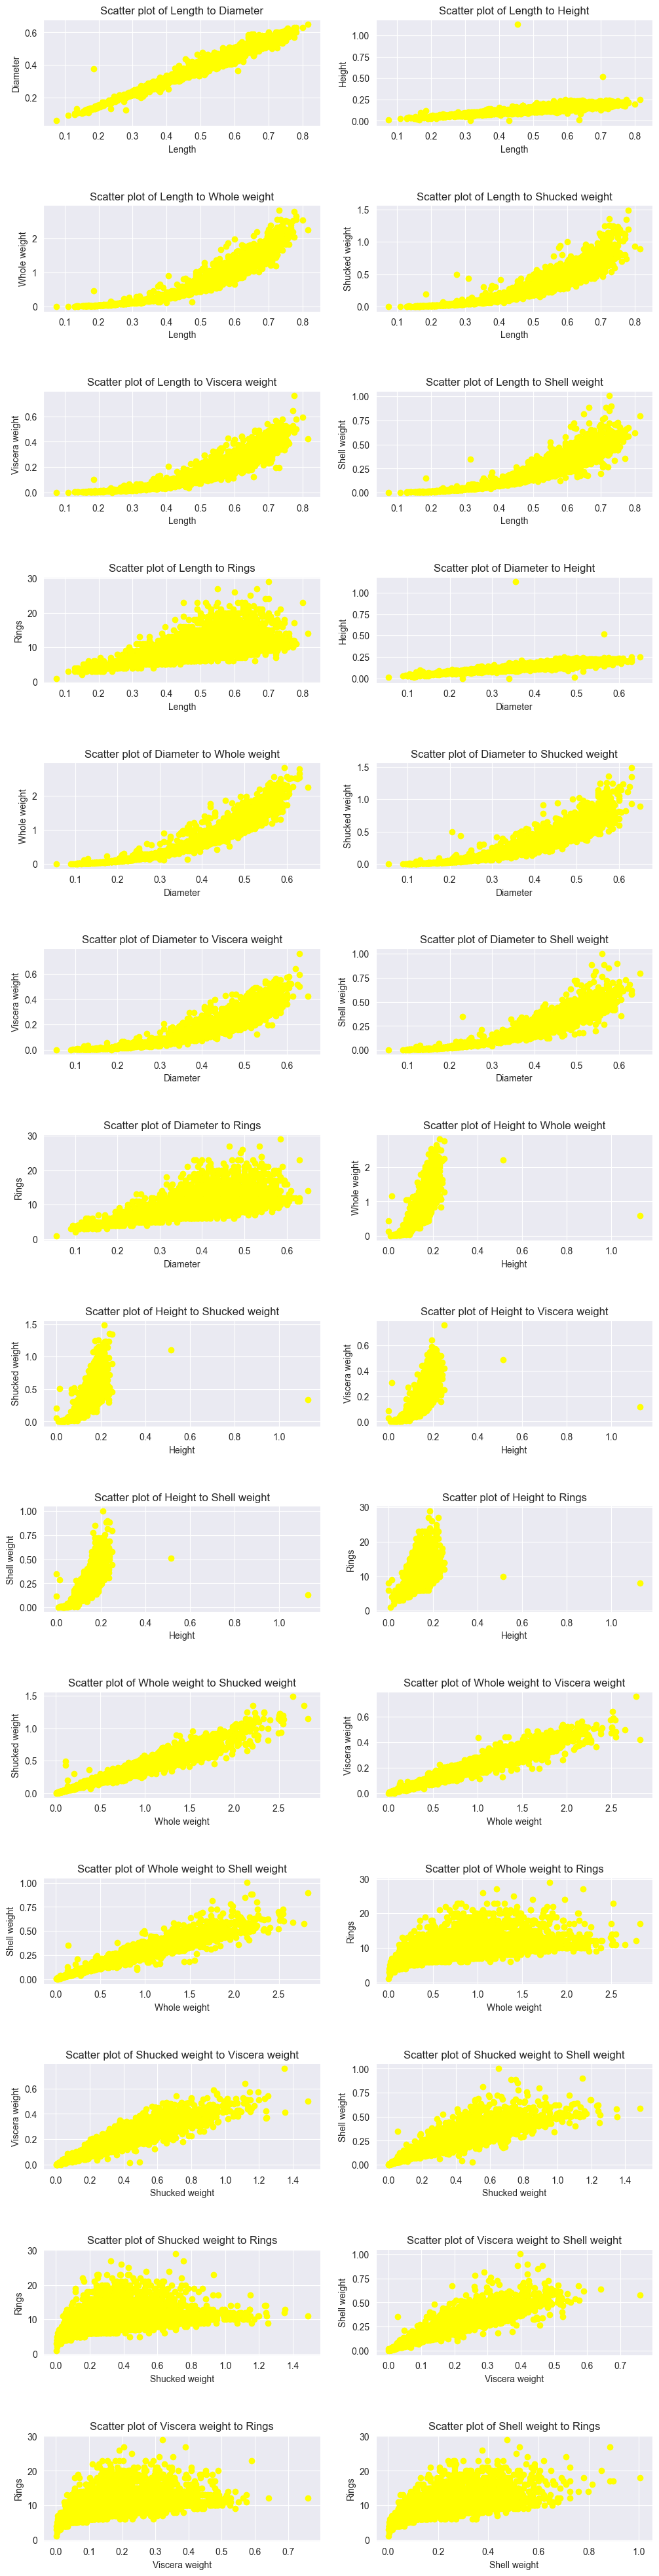

In [8]:
# Requirement 5
# Scatter plot for each pair of the quantitative variables
fig, plots_req5 = plt.subplots(14, 2, figsize=(12, 50))
fig.subplots_adjust(hspace=0.75)

# Determines the second variable in each pair
p = 2
# A variable to keep track of subplots
i = 0
for variable in column_names[1:]:
    for variable2 in column_names[p:]:
        row = i // 2
        col = i % 2
        plots_req5[row, col].scatter(data[variable], data[variable2], color='yellow')
        plots_req5[row, col].set_title(f'Scatter plot of {variable} to {variable2}')
        plots_req5[row, col].set_xlabel(variable)
        plots_req5[row, col].set_ylabel(variable2)
        i += 1
    p += 1
plt.show()

In [9]:
# Requirement 6
# Linear correlation matrix of all quantitative variables table 
correlation_matrix = data[column_names[1:]].corr()
display(correlation_matrix)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


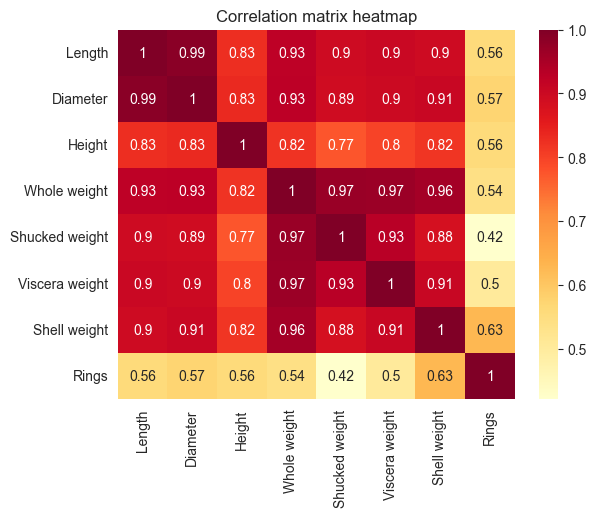

In [10]:
# Requirement 7
# Heatmap representing a linear correlation matrix of all quantitative variables
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title("Correlation matrix heatmap")
plt.show()

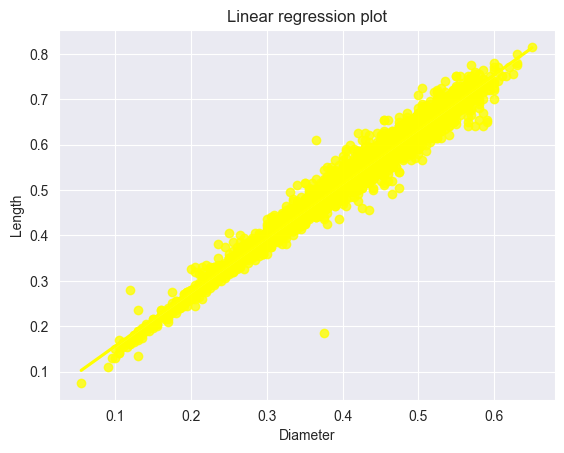

In [26]:
# Requirement 8
# Linear regression plot with the two quantitative variables that are most strongly linearly correlated
# sns.regplot(data=data, x='length', y='diameter', color='yellow')
# plt.title("linear regression")
# plt.show()

# to mnie zastanawia bo powinniosmy najpierw dynamicznie chyba sprawdzic co ma najwieksza korelacje
# ale wychodzi troche inny wykres wtedy
strongest_correlation = correlation_matrix.abs().stack().sort_values(ascending=False)
strongest_correlation = strongest_correlation[strongest_correlation != 1]
variable, variable2 = strongest_correlation.index[0]

sns.regplot(data=data, x=variable, y=variable2, color='yellow')
plt.title("Linear regression plot")
plt.show()

In [60]:
# Requirement for grade 5
# Summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable table
data['Sex'] = data['Sex'].replace({'M': 'Male', 'I': 'Infant', 'F': 'Female'})
sex_order = ['Female', 'Infant', 'Male']

summary_stats = []
unique_features = set()

for variable in column_names[1:]:
    name = variable
    
    for category in sex_order:
        category_data = data[data['Sex'] == category]
        
        sex = category
        mean = category_data[variable].mean()
        std = category_data[variable].std()
        minimum = category_data[variable].min()
        q1 = category_data[variable].quantile(0.25)
        median = category_data[variable].median()
        q3 = category_data[variable].quantile(0.75)
        maximum = category_data[variable].max()
        
        if variable not in unique_features:
            unique_features.add(variable)
        else:
            name = ''
        
        summary_stats.append([name, sex, mean, std, minimum, q1, median, q3, maximum])
        
summary_stats_df = pd.DataFrame(summary_stats, columns=['Feature', 'Sex', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

print(summary_stats_df.to_string(index=False))

       Feature    Sex      mean      std    min      25%      50%       75%     max
        Length Female  0.579093 0.086160 0.2750 0.525000  0.59000  0.640000  0.8150
               Infant  0.427746 0.108858 0.0750 0.360000  0.43500  0.510000  0.7250
                 Male  0.561391 0.102697 0.1550 0.505000  0.58000  0.630000  0.7800
      Diameter Female  0.454732 0.070954 0.1950 0.410000  0.46500  0.505000  0.6500
               Infant  0.326494 0.088109 0.0550 0.270000  0.33500  0.390000  0.5500
                 Male  0.439287 0.084398 0.1100 0.395000  0.45500  0.500000  0.6300
        Height Female  0.158011 0.039984 0.0150 0.140000  0.16000  0.175000  1.1300
               Infant  0.107996 0.031995 0.0000 0.085000  0.11000  0.130000  0.2200
                 Male  0.151381 0.034804 0.0250 0.130000  0.15500  0.175000  0.5150
  Whole weight Female  1.046532 0.430316 0.0800 0.730000  1.03850  1.320250  2.6570
               Infant  0.431363 0.286275 0.0020 0.205500  0.38400  0.599375 